# **Installments**

In [ ]:
pip install mord

In [ ]:
!pip install textblob

In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [ ]:
pip install vaderSentiment

# **Imported Libariries**

In [ ]:
# ===================== IMPORTS =====================

# --- Core Libraries ---
import warnings
import re
import numpy as np
import pandas as pd
from tqdm import tqdm

# --- Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# --- NLP & Text Processing ---
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer

# --- Machine Learning (Classification) ---
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_recall_curve

# --- Machine Learning (Regression) ---
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# --- Feature Selection & Sampling ---
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# --- Utilities ---
import joblib

# ===================== INITIAL SETUP =====================

# NLTK downloads
nltk.download('stopwords')
nltk.download('wordnet')

# Warnings and progress bar
warnings.filterwarnings("ignore")
tqdm.pandas()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **Understand the Dataset**

In [ ]:
df = pd.read_csv('/content/customer_support_tickets.csv', on_bad_lines='skip', engine='python')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [ ]:
df.shape

(8469, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [ ]:
df.describe()

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


In [ ]:
df.describe(include = 'object')

,Customer Name,Customer Email,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
count,8469,8469,8469,8469,8469,8469,8469,8469,8469,2769,8469,8469,5650,2769
unique,8028,8320,3,42,730,5,16,8077,3,2769,4,4,5470,2728
top,Michael Garcia,bsmith@example.com,Male,Canon EOS,2020-10-21,Refund request,Refund request,I'm having an issue with the {product_purchase...,Pending Customer Response,We seat culture plan.,Medium,Email,2023-06-01 20:45:39,2023-06-01 17:14:42
freq,5,4,2896,240,24,1752,576,25,2881,1,2192,2143,3,3


# **Data Cleaning**

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
print(df.isnull().sum())

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64


In [ ]:
print((df.isnull().sum()/df.shape[0])*100)

Ticket ID                        0.000000
Customer Name                    0.000000
Customer Email                   0.000000
Customer Age                     0.000000
Customer Gender                  0.000000
Product Purchased                0.000000
Date of Purchase                 0.000000
Ticket Type                      0.000000
Ticket Subject                   0.000000
Ticket Description               0.000000
Ticket Status                    0.000000
Resolution                      67.304286
Ticket Priority                  0.000000
Ticket Channel                   0.000000
First Response Time             33.286102
Time to Resolution              67.304286
Customer Satisfaction Rating    67.304286
dtype: float64


In [ ]:
df.drop(['Customer Name', 'Customer Email', 'Ticket ID','Ticket Status'], axis=1, inplace=True)
df1 = df[df['Customer Satisfaction Rating'].notnull()].copy()
df1.reset_index(drop=True, inplace=True)

In [ ]:
df1.shape

(2769, 13)

# **Explotary Data Analysis**

In [ ]:
df1.head(3)

,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
1,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
2,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [ ]:
df1_numerical_columns = df1.select_dtypes(include =['int64','float64']).columns
print(df1_numerical_columns)

Index(['Customer Age', 'Customer Satisfaction Rating'], dtype='object')


In [ ]:
df1_categorical_columns = df1.select_dtypes(include=['object']).columns
print(df1_categorical_columns)

Index(['Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Resolution',
       'Ticket Priority', 'Ticket Channel', 'First Response Time',
       'Time to Resolution'],
      dtype='object')


In [ ]:
df1[['Date of Purchase','First Response Time','Time to Resolution']].head(3)

,Date of Purchase,First Response Time,Time to Resolution
0,2020-07-14,2023-06-01 11:14:38,2023-06-01 18:05:38
1,2020-11-13,2023-06-01 07:29:40,2023-06-01 01:57:40
2,2020-02-04,2023-06-01 00:12:42,2023-06-01 19:53:42


In [ ]:
df1['Date of Purchase'] = pd.to_datetime(df1['Date of Purchase'])
df1['First Response Time'] = pd.to_datetime(df1['First Response Time'])
df1['Time to Resolution'] = pd.to_datetime(df1['Time to Resolution'])

df1['Purchase Year'] = df1['Date of Purchase'].dt.year
df1['Purchase Month'] = df1['Date of Purchase'].dt.month
df1['Purchase Month Year'] = df1['Date of Purchase'].dt.to_period('M').astype(str)

# Response delay (in hours)
df1['Response_Delay_Hours'] = (df1['First Response Time']-df1['Date of Purchase']).dt.total_seconds() / 3600

# Resolution time (in hours)
df1['Resolution_Time_Hours'] = (df1['Time to Resolution']-df1['First Response Time']).dt.total_seconds() / 3600

# Total time (in hours)
df1['Total_Time_Hours'] = (df1['Time to Resolution']-df1['Date of Purchase']).dt.total_seconds() / 3600

In [ ]:
df1.head(1)

,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Purchase Year,Purchase Month,Purchase Month Year,Response_Delay_Hours,Resolution_Time_Hours,Total_Time_Hours
0,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,2020,7,2020-07,25259.243889,6.85,25266.093889


# **1. Univariate Analysis**

**1.Numerical Data**

In [ ]:
df1['Customer Satisfaction Rating'].value_counts().sort_values(ascending=False)

,count
Customer Satisfaction Rating,
3.0,580
1.0,553
2.0,549
5.0,544
4.0,543


In [ ]:
print(f"Average Satisfaction Rating : {df1['Customer Satisfaction Rating'].mean().round(2)}")

Average Satisfaction Rating : 2.99


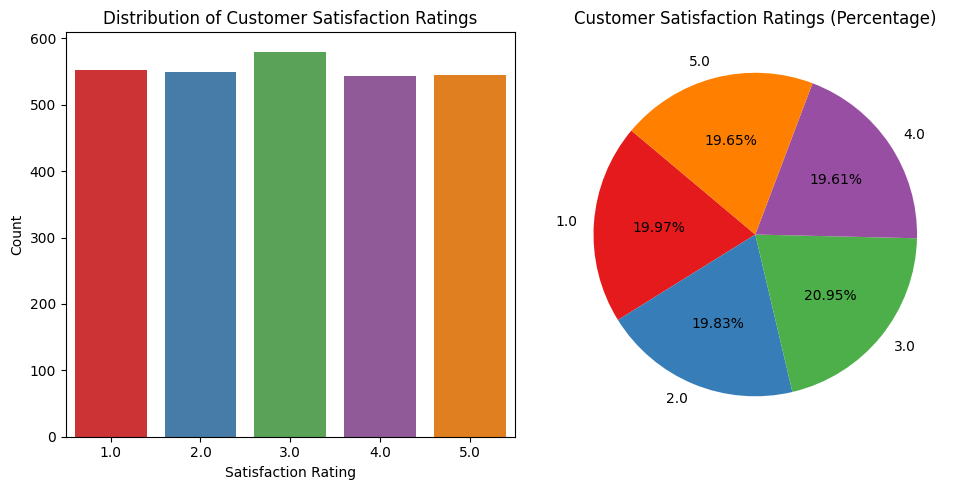

In [ ]:
# Prepare data
rating_counts = df1['Customer Satisfaction Rating'].value_counts().sort_index()
labels = rating_counts.index
sizes = rating_counts.values

# Create the figure with 1 row & 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Left: Countplot
sns.countplot(x='Customer Satisfaction Rating', data=df1, ax=axes[0], palette='Set1')
axes[0].set_title("Distribution of Customer Satisfaction Ratings")
axes[0].set_xlabel("Satisfaction Rating")
axes[0].set_ylabel("Count")

# Right: Pie Chart
axes[1].pie(sizes, labels=labels, autopct='%1.2f%%', startangle=140, colors=sns.color_palette('Set1'))
axes[1].set_title("Customer Satisfaction Ratings (Percentage)")

plt.tight_layout()
plt.show()

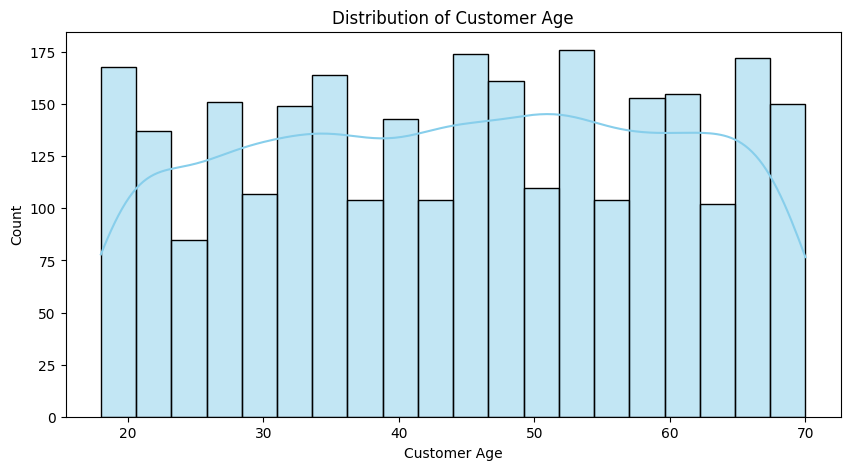

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x='Customer Age',bins=20,kde=True,data=df1,color='skyblue',edgecolor='black')
plt.title("Distribution of Customer Age")
plt.xlabel("Customer Age")
plt.ylabel("Count")
plt.show()

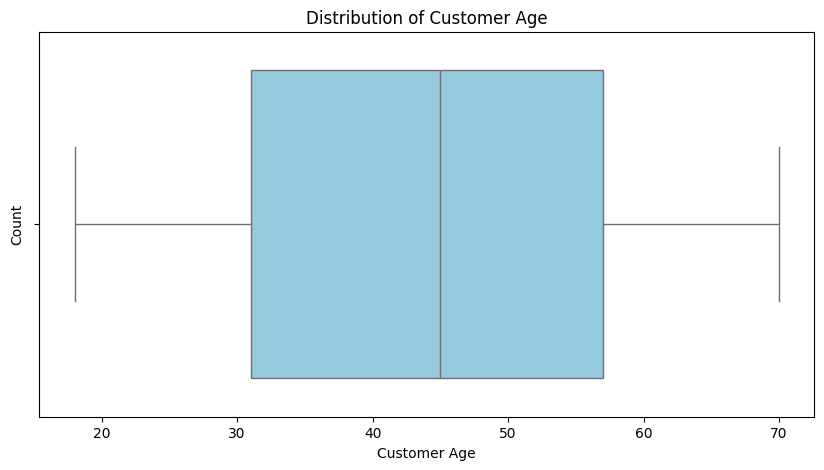

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Customer Age',data=df1,color ='skyblue')
plt.title("Distribution of Customer Age")
plt.xlabel("Customer Age")
plt.ylabel("Count")
plt.show()

In [ ]:
bins = [0, 18, 25, 50, np.inf]
labels = ["Child", "Youth", "Working Age", "Older Adult"]

# Apply age group
df1['Age_Group'] = pd.cut(df1['Customer Age'],bins=bins,labels=labels,include_lowest=True)
df1['Age_Group'].value_counts().sort_values(ascending=False)

,count
Age_Group,
Working Age,1308
Older Adult,1071
Youth,335
Child,55


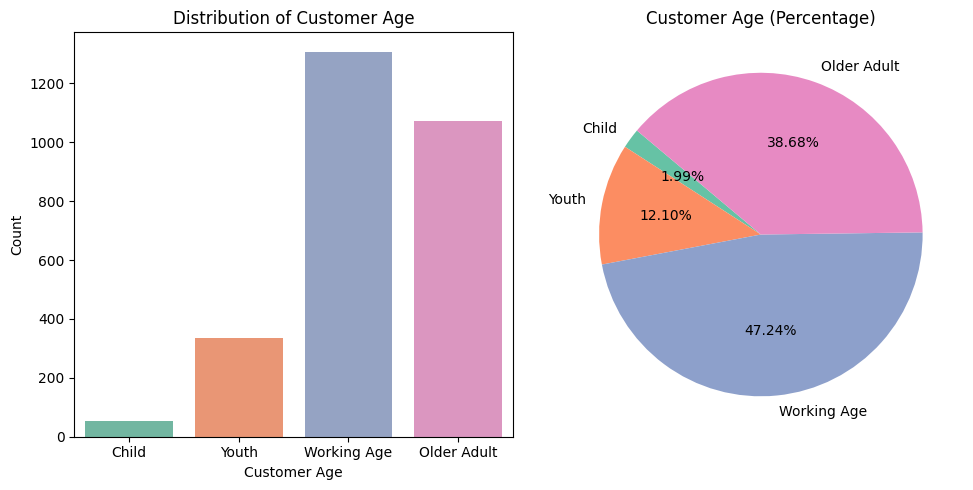

In [ ]:
# Prepare data
agegroup_counts = df1['Age_Group'].value_counts().sort_index()
labels = agegroup_counts.index
sizes = agegroup_counts.values

# Create the figure with 1 row & 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Left: Countplot
sns.countplot(x='Age_Group', data=df1, ax=axes[0], palette='Set2')
axes[0].set_title("Distribution of Customer Age")
axes[0].set_xlabel("Customer Age")
axes[0].set_ylabel("Count")

# Right: Pie Chart
axes[1].pie(sizes, labels=labels, autopct='%1.2f%%', startangle=140, colors=sns.color_palette('Set2'))
axes[1].set_title("Customer Age (Percentage)")

plt.tight_layout()
plt.show()

**2.Categorical Data**

In [ ]:
channel_count= df1['Ticket Priority'].value_counts().sort_values(ascending=False)
channel_count

,count
Ticket Priority,
Critical,726
High,705
Medium,694
Low,644


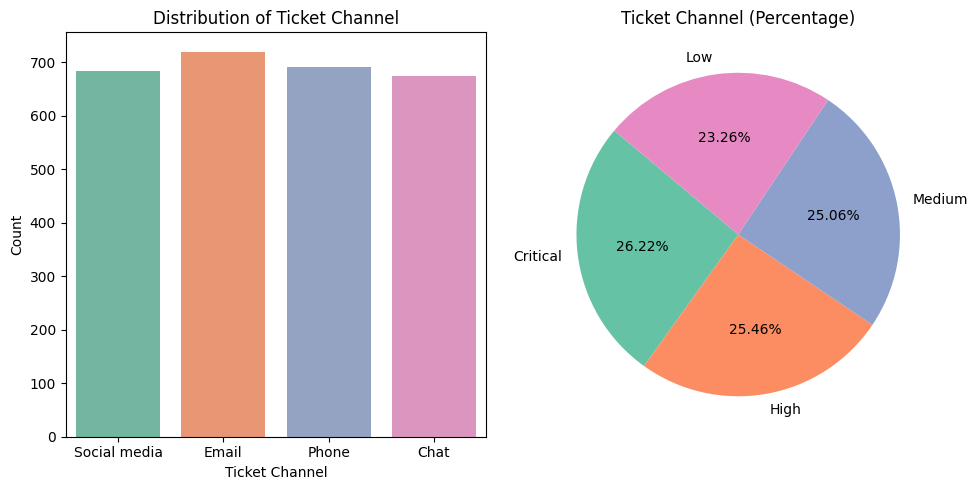

In [ ]:
# Prepare data
labels = channel_count.index
sizes =  channel_count.values

# Create the figure with 1 row & 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Left: Countplot
sns.countplot(x='Ticket Channel', data=df1, ax=axes[0], palette='Set2')
axes[0].set_title("Distribution of Ticket Channel")
axes[0].set_xlabel("Ticket Channel")
axes[0].set_ylabel("Count")

# Right: Pie Chart
axes[1].pie(sizes, labels=labels, autopct='%1.2f%%', startangle=140, colors=sns.color_palette('Set2'))
axes[1].set_title("Ticket Channel (Percentage)")

plt.tight_layout()
plt.show()

In [ ]:
priority_count= df1['Ticket Priority'].value_counts().sort_values(ascending=False)
priority_count

,count
Ticket Priority,
Critical,726
High,705
Medium,694
Low,644


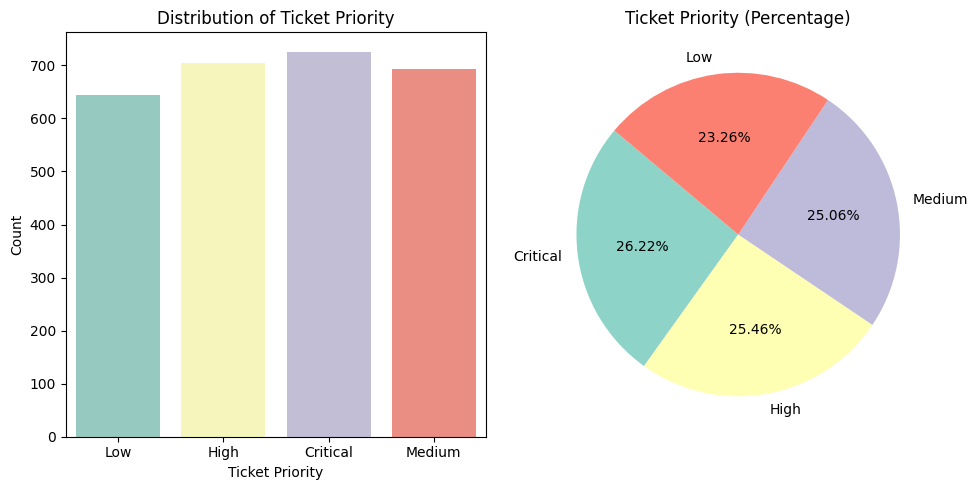

In [ ]:
# Prepare data
labels = priority_count.index
sizes =  priority_count.values

# Create the figure with 1 row & 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Left: Countplot
sns.countplot(x='Ticket Priority', data=df1, ax=axes[0], palette='Set3')
axes[0].set_title("Distribution of Ticket Priority")
axes[0].set_xlabel("Ticket Priority")
axes[0].set_ylabel("Count")

# Right: Pie Chart
axes[1].pie(sizes, labels=labels, autopct='%1.2f%%', startangle=140, colors=sns.color_palette('Set3'))
axes[1].set_title("Ticket Priority (Percentage)")

plt.tight_layout()
plt.show()

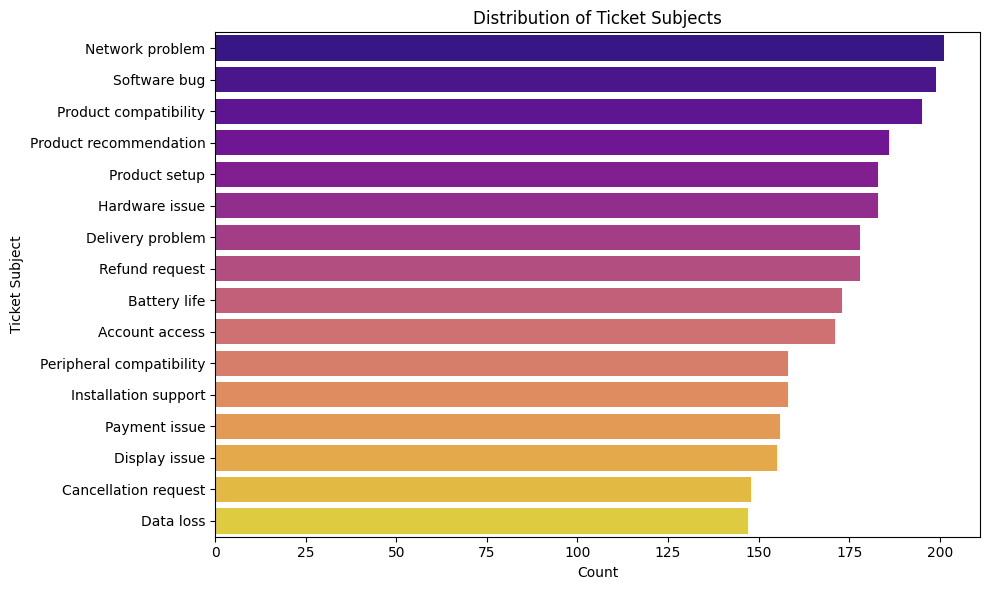

In [ ]:
subject_counts = df1['Ticket Subject'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=subject_counts.values,y=subject_counts.index,palette='plasma')
plt.title("Distribution of Ticket Subjects")
plt.xlabel("Count")
plt.ylabel("Ticket Subject")
plt.tight_layout()
plt.show()

In [ ]:
type_count = df1['Ticket Type'].value_counts().sort_values(ascending=False)
type_count

,count
Ticket Type,
Refund request,596
Technical issue,580
Billing inquiry,544
Product inquiry,533
Cancellation request,516


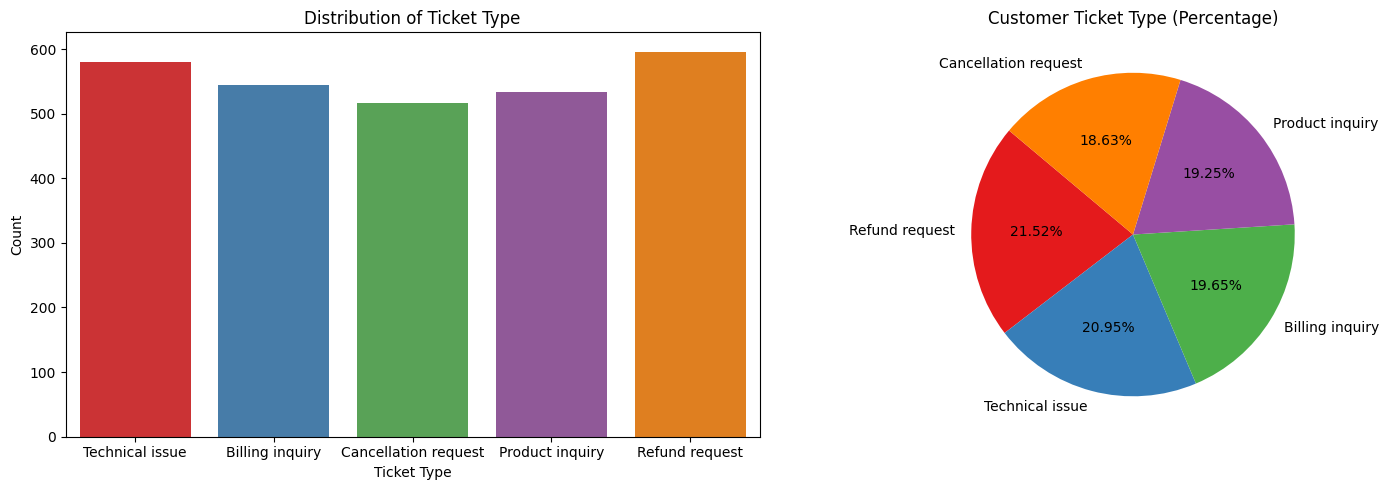

In [ ]:
# Prepare data
labels = type_count.index
sizes = type_count.values

# Create the figure with 1 row & 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Left: Countplot
sns.countplot(x='Ticket Type', data=df1, ax=axes[0], palette='Set1')
axes[0].set_title("Distribution of Ticket Type")
axes[0].set_xlabel("Ticket Type")
axes[0].set_ylabel("Count")

# Right: Pie Chart
axes[1].pie(sizes, labels=labels, autopct='%1.2f%%', startangle=140, colors=sns.color_palette('Set1'))
axes[1].set_title("Customer Ticket Type (Percentage)")

plt.tight_layout()
plt.show()

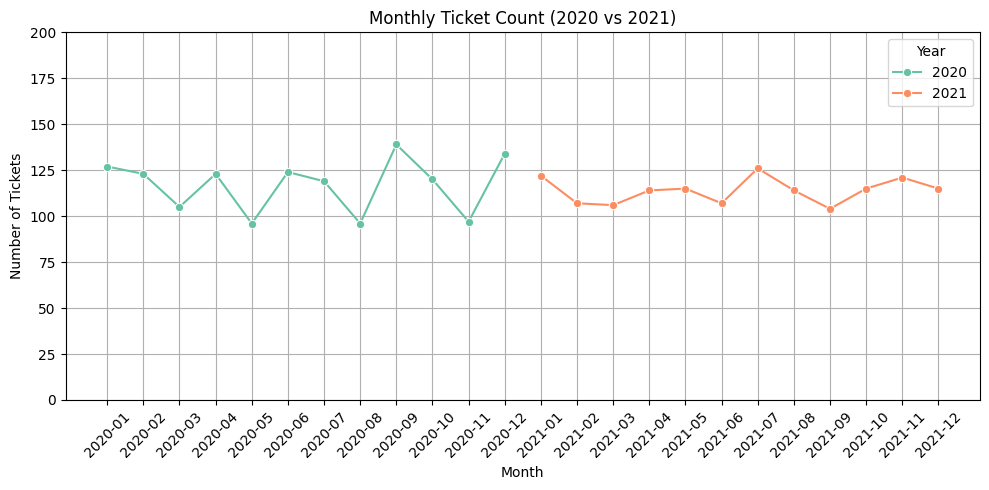

In [ ]:
# Count tickets per month-year & year
monthly_counts = (df1.groupby(['Purchase Month Year', 'Purchase Year']).size().reset_index(name='Ticket Count'))

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_counts,x='Purchase Month Year',y='Ticket Count',hue='Purchase Year',marker='o',palette='Set2')
plt.title('Monthly Ticket Count (2020 vs 2021)')
plt.xlabel('Month')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.ylim(0,200)
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
top_10 = df1['Product Purchased'].value_counts().sort_values(ascending=False).head(10)
print(top_10)

Product Purchased
Canon EOS            83
iPhone               82
Canon DSLR Camera    81
GoPro Hero           80
Microsoft Office     80
Sony Xperia          78
Sony 4K HDR TV       74
Apple AirPods        74
Nest Thermostat      73
LG OLED              73
Name: count, dtype: int64


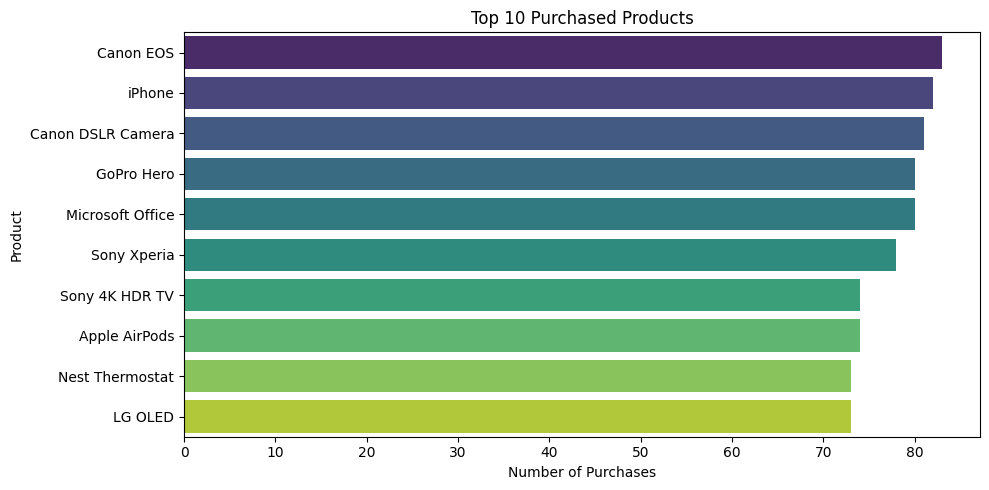

In [ ]:
plt.figure(figsize=(10, 5))

sns.barplot(x=top_10.values,y=top_10.index,palette='viridis')

plt.title("Top 10 Purchased Products")
plt.xlabel("Number of Purchases")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

In [ ]:
gender_count = df1['Customer Gender'].value_counts(normalize=True) * 100
gender_count.name = '%'
gender_count = gender_count.sort_values(ascending=False)
gender_count

,%
Customer Gender,
Female,35.536295
Male,33.080534
Other,31.383171


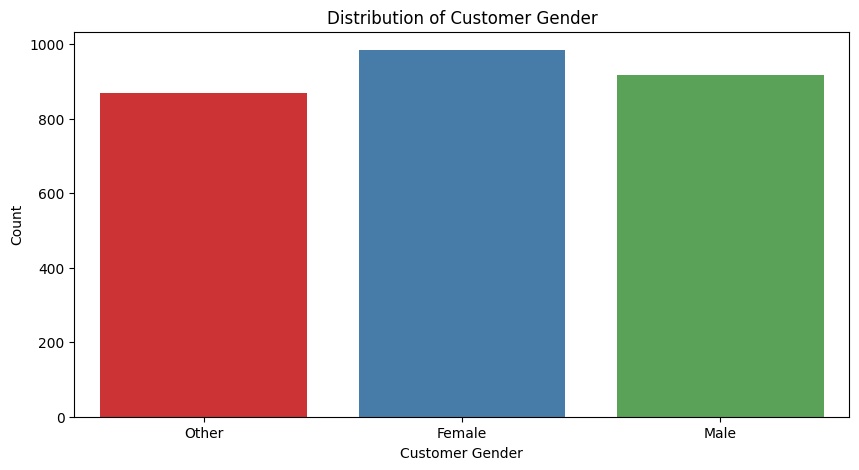

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Customer Gender',data=df1,palette='Set1')
plt.title("Distribution of Customer Gender")
plt.xlabel("Customer Gender")
plt.ylabel("Count")
plt.show()

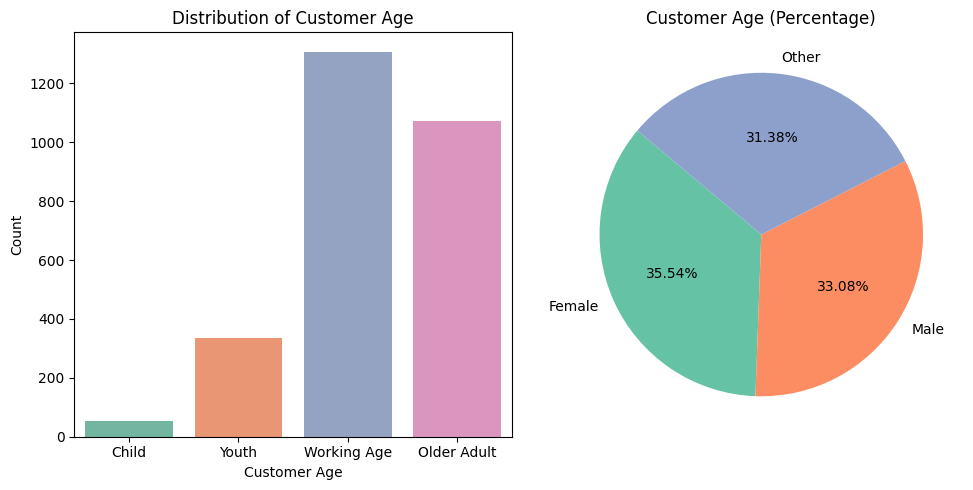

In [ ]:
# Prepare data
gender_counts = df1['Customer Gender'].value_counts().sort_index()
labels = gender_counts.index
sizes = gender_counts.values

# Create the figure with 1 row & 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Left: Countplot
sns.countplot(x='Age_Group', data=df1, ax=axes[0], palette='Set2')
axes[0].set_title("Distribution of Customer Age")
axes[0].set_xlabel("Customer Age")
axes[0].set_ylabel("Count")

# Right: Pie Chart
axes[1].pie(sizes, labels=labels, autopct='%1.2f%%', startangle=140, colors=sns.color_palette('Set2'))
axes[1].set_title("Customer Age (Percentage)")

plt.tight_layout()
plt.show()

# **2. Bivariate Analysis**

In [ ]:
df1.columns

Index(['Customer Age', 'Customer Gender', 'Product Purchased',
       'Date of Purchase', 'Ticket Type', 'Ticket Subject',
       'Ticket Description', 'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating', 'Purchase Year', 'Purchase Month',
       'Purchase Month Year', 'Response_Delay_Hours', 'Resolution_Time_Hours',
       'Total_Time_Hours', 'Age_Group'],
      dtype='object')

In [ ]:
# Compute average ratings
avg_rating = df1.groupby('Ticket Channel')['Customer Satisfaction Rating'].mean().reset_index().head(10)
avg_rating.sort_values('Customer Satisfaction Rating',ascending=False,inplace=True)
avg_rating

,Ticket Channel,Customer Satisfaction Rating
0,Chat,3.083086
3,Social media,2.969298
1,Email,2.963889
2,Phone,2.952243


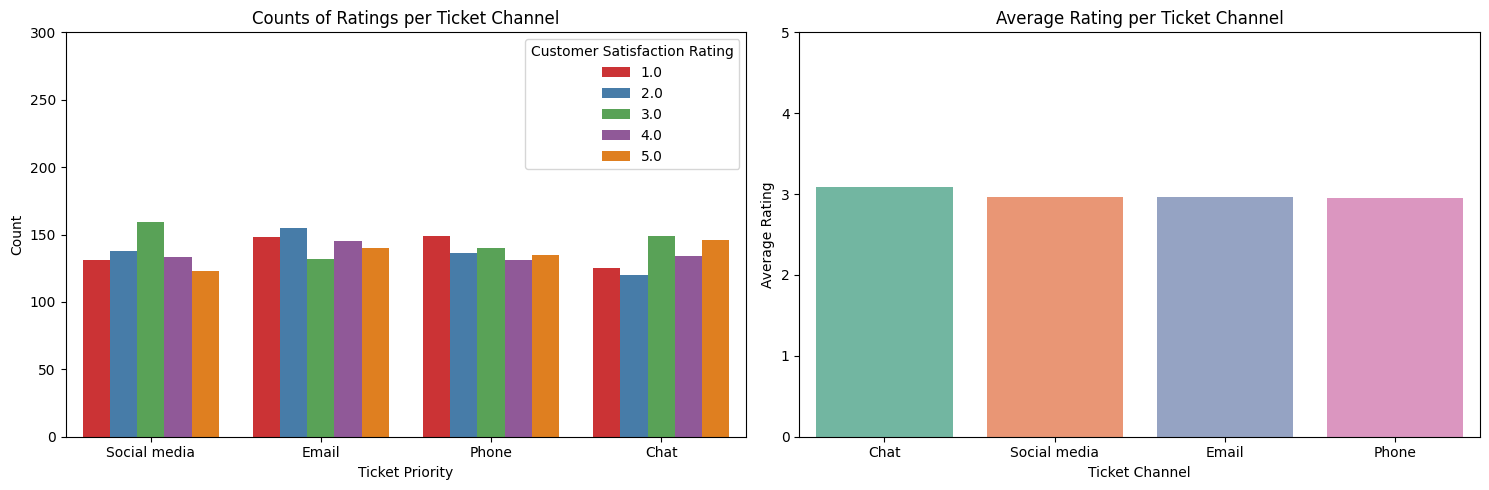

In [ ]:
# Create figure
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Left: countplot
sns.countplot(x='Ticket Channel',hue='Customer Satisfaction Rating',data=df1,palette='Set1',ax=axes[0])
axes[0].set_title("Counts of Ratings per Ticket Channel")
axes[0].set_xlabel("Ticket Priority")
axes[0].set_ylabel("Count")
axes[0].set_ylim(0,300)

# Right: average rating
sns.barplot(x='Ticket Channel',y='Customer Satisfaction Rating',data=avg_rating,palette='Set2',ax=axes[1])
axes[1].set_title("Average Rating per Ticket Channel")
axes[1].set_xlabel("Ticket Channel")
axes[1].set_ylabel("Average Rating")
axes[1].set_ylim(0, 5)

plt.tight_layout()
plt.show()

In [ ]:
# Compute average ratings
avg_rating = df1.groupby('Ticket Priority')['Customer Satisfaction Rating'].mean().reset_index().head(10)
avg_rating.sort_values('Customer Satisfaction Rating',ascending=False,inplace=True)
avg_rating

,Ticket Priority,Customer Satisfaction Rating
2,Low,3.052795
1,High,2.982979
3,Medium,2.976945
0,Critical,2.958678


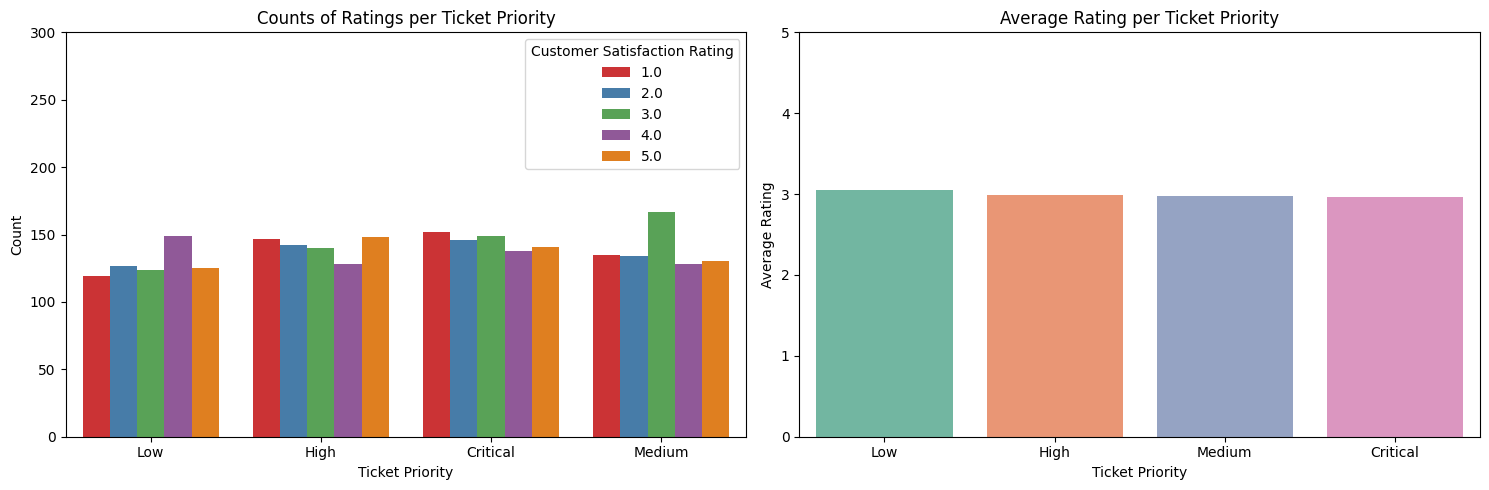

In [ ]:
# Create figure
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Left: countplot
sns.countplot(x='Ticket Priority',hue='Customer Satisfaction Rating',data=df1,palette='Set1',ax=axes[0])
axes[0].set_title("Counts of Ratings per Ticket Priority")
axes[0].set_xlabel("Ticket Priority")
axes[0].set_ylabel("Count")
axes[0].set_ylim(0,300)

# Right: average rating
sns.barplot(x='Ticket Priority',y='Customer Satisfaction Rating',data=avg_rating,palette='Set2',ax=axes[1])
axes[1].set_title("Average Rating per Ticket Priority")
axes[1].set_xlabel("Ticket Priority")
axes[1].set_ylabel("Average Rating")
axes[1].set_ylim(0, 5)

plt.tight_layout()
plt.show()

In [ ]:
# Compute average ratings
avg_rating = df1.groupby('Ticket Subject')['Customer Satisfaction Rating'].mean().reset_index().head(10)
avg_rating.sort_values('Customer Satisfaction Rating',ascending=False,inplace=True)
avg_rating

,Ticket Subject,Customer Satisfaction Rating
7,Installation support,3.183544
5,Display issue,3.077419
2,Cancellation request,3.067568
9,Payment issue,3.057692
6,Hardware issue,3.000000
3,Data loss,2.965986
1,Battery life,2.953757
0,Account access,2.941520
8,Network problem,2.880597
4,Delivery problem,2.803371


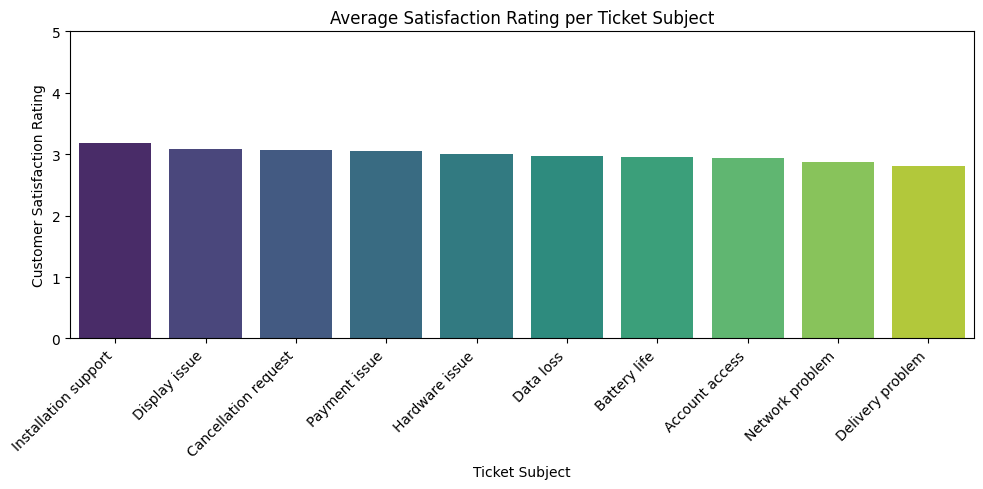

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Ticket Subject', y='Customer Satisfaction Rating', data=avg_rating, palette='viridis')
plt.title("Average Satisfaction Rating per Ticket Subject")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

In [ ]:
# Compute average ratings
avg_rating = df1.groupby('Ticket Type')['Customer Satisfaction Rating'].mean().reset_index().head(10)
avg_rating.sort_values('Customer Satisfaction Rating',ascending=False,inplace=True)
avg_rating

,Ticket Type,Customer Satisfaction Rating
1,Cancellation request,3.029070
0,Billing inquiry,3.027574
2,Product inquiry,3.016886
4,Technical issue,2.958621
3,Refund request,2.934564


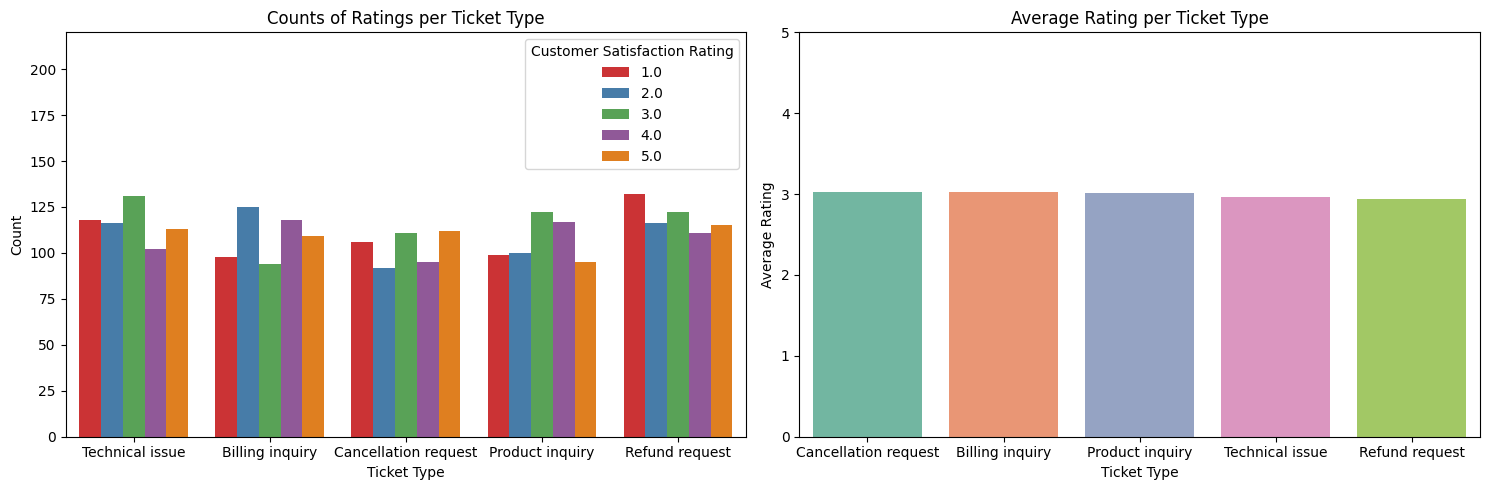

In [ ]:
# Create figure
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Left: countplot
sns.countplot(x='Ticket Type',hue='Customer Satisfaction Rating',data=df1,palette='Set1',ax=axes[0])
axes[0].set_title("Counts of Ratings per Ticket Type")
axes[0].set_xlabel("Ticket Type")
axes[0].set_ylabel("Count")
axes[0].set_ylim(0,220)

# Right: average rating
sns.barplot(x='Ticket Type',y='Customer Satisfaction Rating',data=avg_rating,palette='Set2',ax=axes[1])
axes[1].set_title("Average Rating per Ticket Type")
axes[1].set_xlabel("Ticket Type")
axes[1].set_ylabel("Average Rating")
axes[1].set_ylim(0, 5)

plt.tight_layout()
plt.show()

In [ ]:
# Compute average ratings
avg_rating = df1.groupby('Product Purchased')['Customer Satisfaction Rating'].mean().reset_index().head(10)
avg_rating.sort_values('Customer Satisfaction Rating',ascending=False,inplace=True)
avg_rating

,Product Purchased,Customer Satisfaction Rating
5,Autodesk AutoCAD,3.203125
4,Asus ROG,3.196721
8,Canon DSLR Camera,3.074074
1,Amazon Echo,3.041667
0,Adobe Photoshop,2.968254
9,Canon EOS,2.939759
2,Amazon Kindle,2.893939
7,Bose SoundLink Speaker,2.890625
6,Bose QuietComfort,2.823529
3,Apple AirPods,2.810811


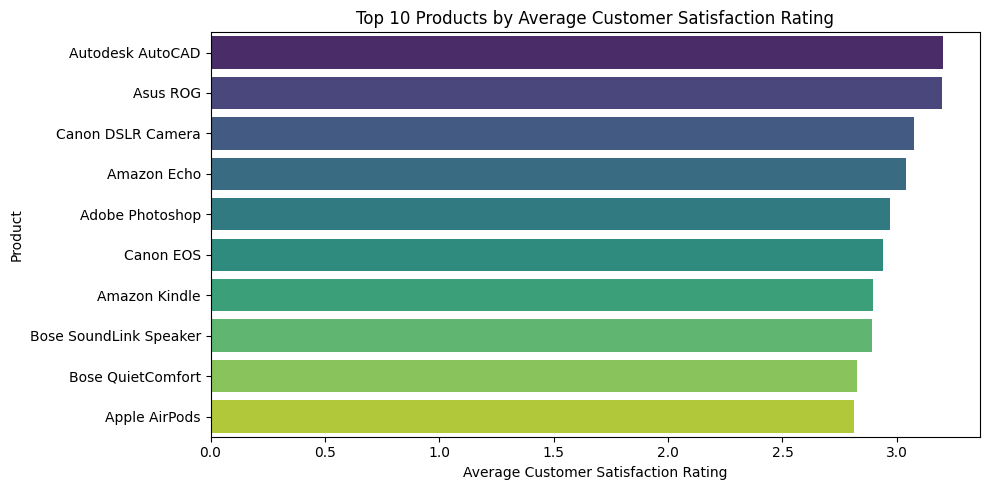

In [ ]:
plt.figure(figsize=(10, 5))

sns.barplot(x='Customer Satisfaction Rating', y='Product Purchased', data=avg_rating, palette='viridis')

plt.title("Top 10 Products by Average Customer Satisfaction Rating")
plt.xlabel("Average Customer Satisfaction Rating")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

In [ ]:
# Compute average ratings
avg_rating = df1.groupby('Customer Gender')['Customer Satisfaction Rating'].mean().reset_index()
avg_rating.sort_values('Customer Satisfaction Rating',ascending=False,inplace=True)
avg_rating

,Customer Gender,Customer Satisfaction Rating
1,Male,3.028384
2,Other,2.974684
0,Female,2.971545


In [ ]:
# Compute mode ratings
mode_rating = df1.groupby('Customer Gender')['Customer Satisfaction Rating'].agg(lambda x: pd.Series.mode(x)[0]).reset_index()
mode_rating.sort_values('Customer Satisfaction Rating',ascending=False,inplace=True)
mode_rating

,Customer Gender,Customer Satisfaction Rating
0,Female,4.0
1,Male,3.0
2,Other,1.0


In [ ]:
df1.head(1)

,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Purchase Year,Purchase Month,Purchase Month Year,Response_Delay_Hours,Resolution_Time_Hours,Total_Time_Hours,Age_Group
0,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,2020,7,2020-07,25259.243889,6.85,25266.093889,Working Age


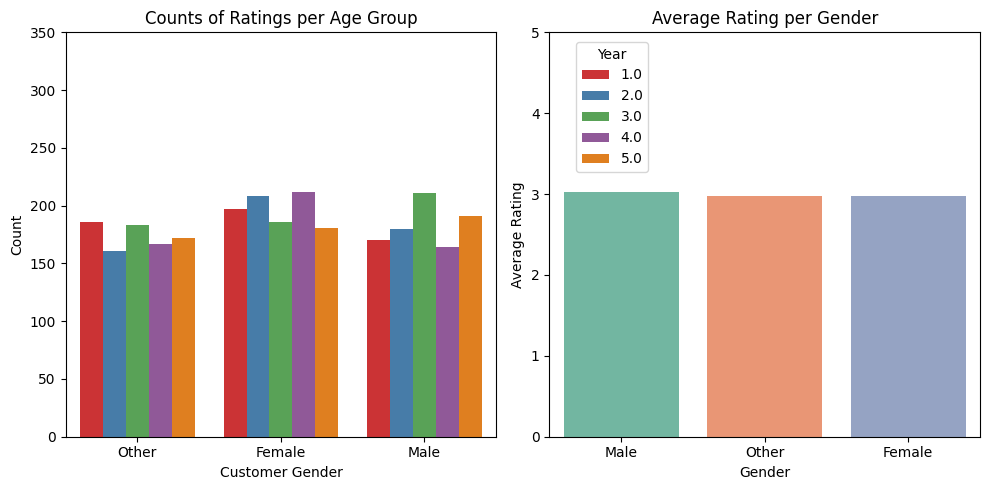

In [ ]:
# Create figure
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Left: countplot
sns.countplot(x='Customer Gender',hue='Customer Satisfaction Rating',data=df1,palette='Set1',ax=axes[0])
axes[0].set_title("Counts of Ratings per Age Group")
axes[0].set_xlabel("Customer Gender")
axes[0].set_ylabel("Count")
axes[0].set_ylim(0,350)
axes[0].get_legend().remove()

# Right: average rating
sns.barplot(x='Customer Gender',y='Customer Satisfaction Rating',data=avg_rating,palette='Set2',ax=axes[1])
axes[1].set_title("Average Rating per Gender")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Average Rating")
axes[1].set_ylim(0, 5)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels,title='Year',loc='upper right',bbox_to_anchor=(0.66, 0.92))

plt.tight_layout()
plt.show()

In [ ]:
# Compute average ratings
avg_rating = df1.groupby('Age_Group')['Customer Satisfaction Rating'].mean().reset_index()
avg_rating.sort_values('Customer Satisfaction Rating',ascending=False,inplace=True)
avg_rating

,Age_Group,Customer Satisfaction Rating
0,Child,3.018182
2,Working Age,3.017584
3,Older Adult,2.969188
1,Youth,2.955224


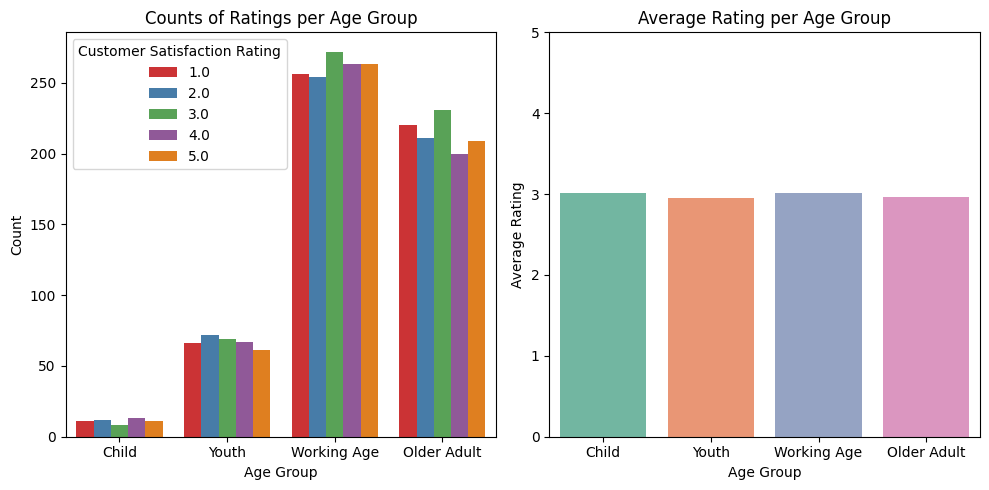

In [ ]:
# Create figure
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Left: countplot
sns.countplot(x='Age_Group',hue='Customer Satisfaction Rating',data=df1,palette='Set1',ax=axes[0])
axes[0].set_title("Counts of Ratings per Age Group")
axes[0].set_xlabel("Age Group")
axes[0].set_ylabel("Count")

# Right: average rating
sns.barplot(x='Age_Group',y='Customer Satisfaction Rating',data=avg_rating,palette='Set2',ax=axes[1])
axes[1].set_title("Average Rating per Age Group")
axes[1].set_xlabel("Age Group")
axes[1].set_ylabel("Average Rating")
axes[1].set_ylim(0, 5)

plt.tight_layout()
plt.show()

In [ ]:
#Mean average rating
mean_rating = df1.groupby('Purchase Year')['Customer Satisfaction Rating'].mean()
print(mean_rating)

#Filter for 2020 & 2021
df_filtered = df1[df1['Purchase Year'].isin([2020, 2021])]

#Compute average ratings per year
mean_rating = df_filtered.groupby('Purchase Year')['Customer Satisfaction Rating'].mean().reset_index()

Purchase Year
2020    3.041340
2021    2.939971
Name: Customer Satisfaction Rating, dtype: float64


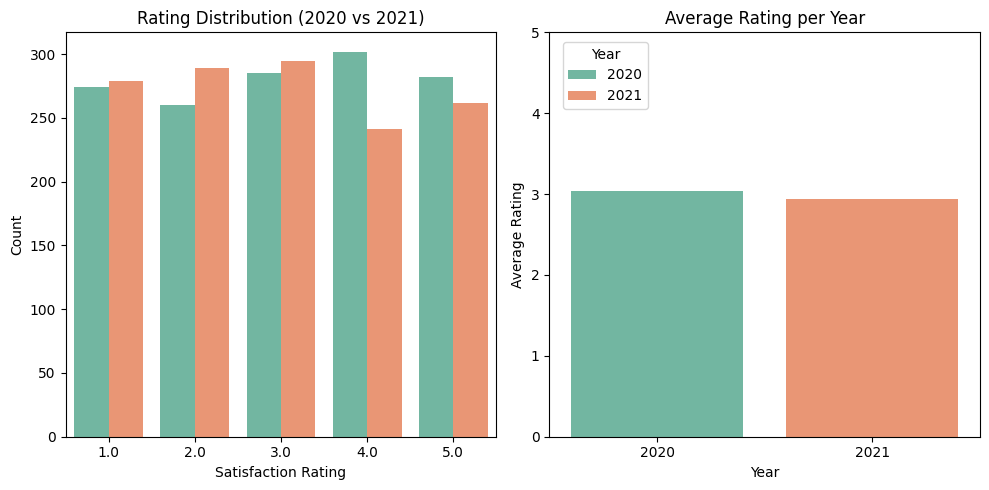

In [ ]:
#Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#Left: Count of each rating by year
sns.countplot(x='Customer Satisfaction Rating',hue='Purchase Year',data=df_filtered,palette='Set2',ax=axes[0])
axes[0].set_title("Rating Distribution (2020 vs 2021)")
axes[0].set_xlabel("Satisfaction Rating")
axes[0].set_ylabel("Count")
axes[0].get_legend().remove()

#Right: Average rating per year
sns.barplot(x='Purchase Year',y='Customer Satisfaction Rating',data=mean_rating,palette='Set2',ax=axes[1])
axes[1].set_title("Average Rating per Year")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Average Rating")
axes[1].set_ylim(0, 5)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels,title='Year',loc='upper right',bbox_to_anchor=(0.66, 0.92))

plt.tight_layout()
plt.show()

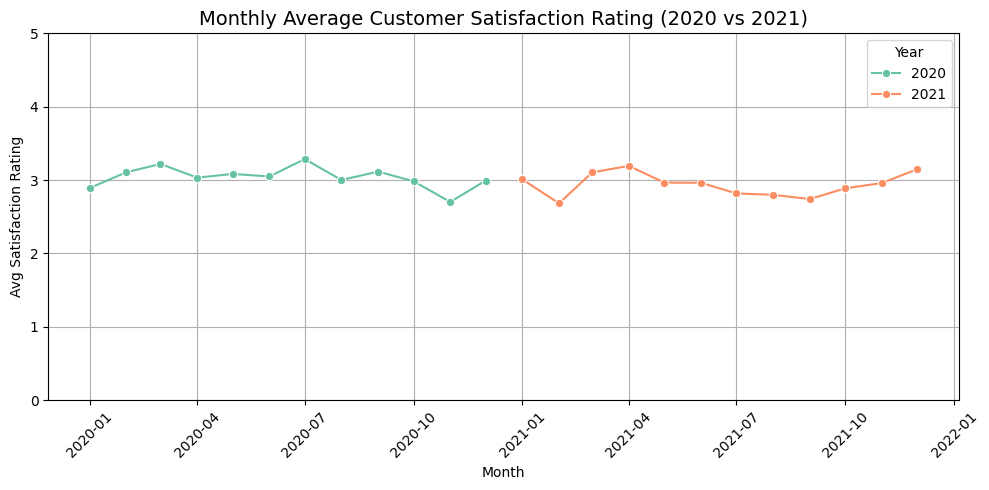

In [ ]:
monthly_avg = df1.groupby(['Purchase Month Year', 'Purchase Year'])['Customer Satisfaction Rating'].mean().reset_index()
monthly_avg['Purchase Month Year'] = pd.to_datetime(monthly_avg['Purchase Month Year'])

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_avg, x='Purchase Month Year', y='Customer Satisfaction Rating', hue='Purchase Year', marker='o', palette='Set2')
plt.title('Monthly Average Customer Satisfaction Rating (2020 vs 2021)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Avg Satisfaction Rating')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.ylim(0,5)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df1.columns

Index(['Customer Age', 'Customer Gender', 'Product Purchased',
       'Date of Purchase', 'Ticket Type', 'Ticket Subject',
       'Ticket Description', 'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating', 'Purchase Year', 'Purchase Month',
       'Purchase Month Year', 'Response_Delay_Hours', 'Resolution_Time_Hours',
       'Total_Time_Hours', 'Age_Group'],
      dtype='object')

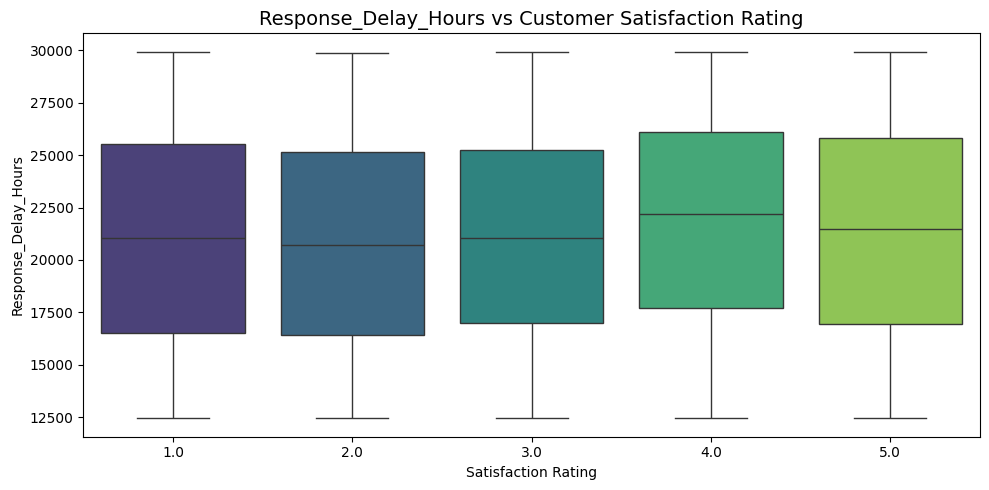

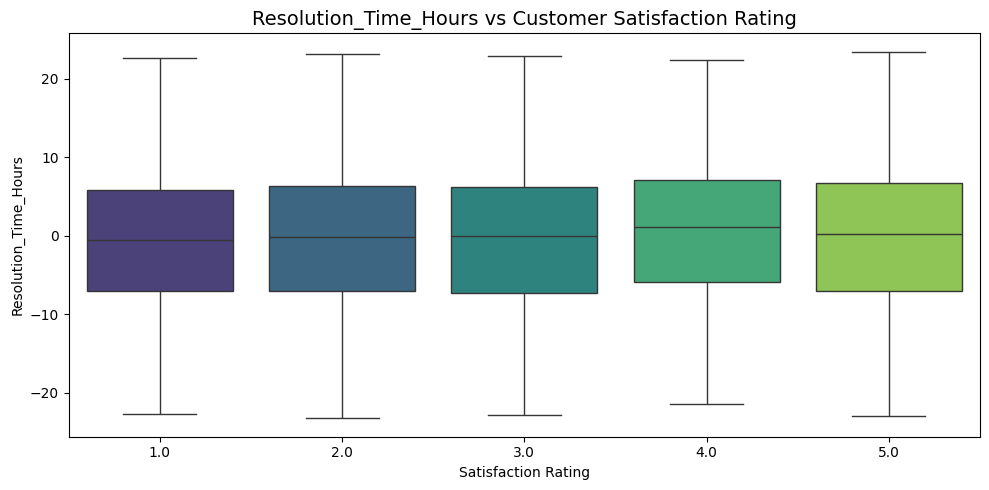

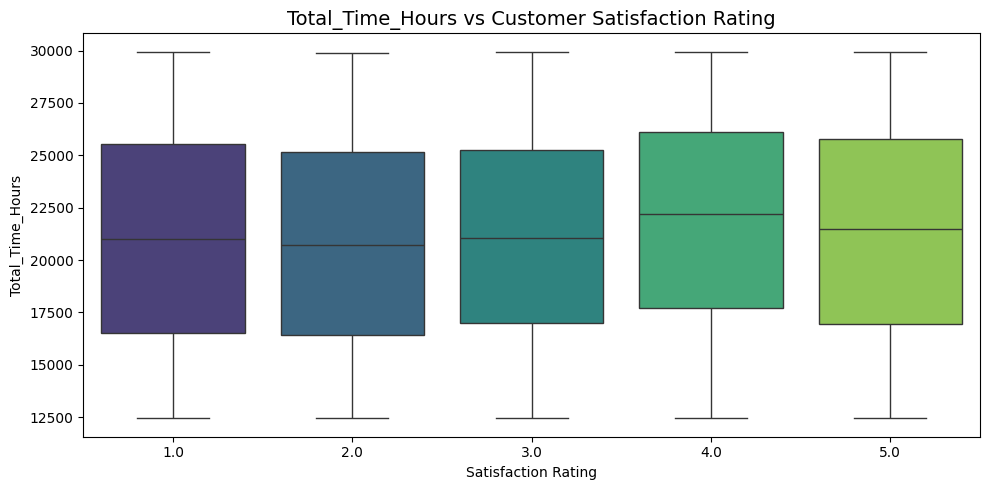

In [ ]:
time_columns = ['Response_Delay_Hours', 'Resolution_Time_Hours', 'Total_Time_Hours']

for col in time_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Customer Satisfaction Rating', y=col, data=df1, palette='viridis')
    plt.title(f"{col} vs Customer Satisfaction Rating", fontsize=14)
    plt.xlabel("Satisfaction Rating")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


In [ ]:
df1.head(1)

,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Purchase Year,Purchase Month,Purchase Month Year,Response_Delay_Hours,Resolution_Time_Hours,Total_Time_Hours,Age_Group
0,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,2020,7,2020-07,25259.243889,6.85,25266.093889,Working Age


# **Data Preprocessing**

In [ ]:
# ===================== BASIC CLEANING FUNCTIONS =====================
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

stop = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text).lower())
    words = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop]
    return ' '.join(words)

# ===================== DATETIME FEATURES =====================
for col in ['Date of Purchase', 'First Response Time', 'Time to Resolution']:
    df1[col] = pd.to_datetime(df1[col], errors='coerce')

df1['purchase_month'] = df1['Date of Purchase'].dt.month
df1['purchase_year'] = df1['Date of Purchase'].dt.year
df1['Purchase Month Year'] = df1['Date of Purchase'].dt.to_period('M').astype(str)
df1['Is_Weekend_Purchase'] = df1['Date of Purchase'].dt.weekday >= 5

df1['first_response_days'] = (df1['First Response Time'] - df1['Date of Purchase']).dt.total_seconds() / (60 * 60 * 24)
df1['resolution_days'] = (df1['Time to Resolution'] - df1['Date of Purchase']).dt.total_seconds() / (60 * 60 * 24)

df1['Response_Delay_Hours'] = (df1['First Response Time'] - df1['Date of Purchase']).dt.total_seconds() / 3600
df1['Resolution_Time_Hours'] = (df1['Time to Resolution'] - df1['First Response Time']).dt.total_seconds() / 3600
df1['Total_Time_Hours'] = (df1['Time to Resolution'] - df1['Date of Purchase']).dt.total_seconds() / 3600
# ===================== TIME RATIOS =====================
df1['Resolution_vs_Response'] = df1['Resolution_Time_Hours'] / (df1['Response_Delay_Hours'] + 1e-3)
df1['Total_vs_Response'] = df1['Total_Time_Hours'] / (df1['Response_Delay_Hours'] + 1e-3)
df1['Total_vs_Resolution'] = df1['Total_Time_Hours'] / (df1['Resolution_Time_Hours'] + 1e-3)

# ===================== AGE GROUP + TEXT =====================
def age_group(age):
    if age < 25:
        return "Youth"
    elif age < 60:
        return "Adult"
    else:
        return "Senior"
df1['customer_age_group'] = df1['Customer Age'].apply(age_group)

df1['clean_description'] = df1['Ticket Description'].apply(preprocess_text)
df1['clean_subject'] = df1['Ticket Subject'].apply(preprocess_text)
df1['ticket_length'] = df1['clean_description'].apply(lambda x: len(x.split()))
df1['is_critical'] = df1['Ticket Priority'].str.lower().str.strip().apply(lambda x: 1 if x == 'critical' else 0)

# ===================== SENTIMENT & KEYWORDS =====================
df1['sentiment_score'] = df1['Ticket Description'].progress_apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df1['subject_sentiment'] = df1['Ticket Subject'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

from collections import OrderedDict

keywords = [
    # Emotional Tone
    'angry', 'disappointed', 'frustrated', 'concerned',

    # Common Support Words
    'problem', 'issue', 'error', 'bug', 'fail', 'help', 'support', 'crash', 'freeze', 'not working', 'stuck',

    # Action & Urgency
    'urgent', 'as soon as possible', 'immediately', 'affecting my work', 'productivity', 'critical', 'emergency',

    # Product/Device Issues
    'broken', 'missing', 'incompatible', 'overheating', 'restart', 'reset', 'setup', 'installation', 'update', 'slow',

    # Complaints
    'refund', 'cancel', 'delay', 'late', 'waiting', 'no response', 'wrong item', 'faulty',

    # Technical/Specific
    'login', 'payment', 'disconnect', 'security', 'data', 'software update', 'troubleshooting', 'manual', 'unresolved',

    # Experience-based
    'already contacted', 'still not working', 'persisting', 'didn’t help', 'error message',
]


# Remove duplicates
keywords = list(OrderedDict.fromkeys(keywords))
# Use cleaned description for better matching
for kw in keywords:
    df1[f'has_{kw.replace(" ", "_")}'] = df1['clean_description'].str.contains(kw, case=False, regex=False).astype(int)

priority_map = {'Low': 1, 'Medium': 2, 'High': 3, 'Critical': 4}
df1['Priority_Num'] = df1['Ticket Priority'].map(priority_map).fillna(0)

# ===================== INTERACTION FEATURES =====================
df1['priority_critical'] = df1['Priority_Num'] * df1['is_critical']
df1['age_ticket_length'] = df1['Customer Age'] * df1['ticket_length']
df1['sentiment_priority'] = df1['sentiment_score'] * df1['Priority_Num']
df1['sentiment_age'] = df1['sentiment_score'] * df1['Customer Age']
df1['sentiment_length'] = df1['sentiment_score'] * df1['ticket_length']

# ===================== TF-IDF FEATURES =====================
df1['clean_Description'] = df1['Ticket Description'].fillna('').apply(clean_text)
df1['clean_Resolution'] = df1['Resolution'].fillna('').apply(clean_text)

desc_vectorizer = TfidfVectorizer(max_features=150)
desc_matrix = desc_vectorizer.fit_transform(df1['clean_Description'])
desc_df = pd.DataFrame(desc_matrix.toarray(), columns=[f'desc_tfidf_{i}' for i in range(desc_matrix.shape[1])])

res_vectorizer = TfidfVectorizer(max_features=150)
res_matrix = res_vectorizer.fit_transform(df1['clean_Resolution'])
res_df = pd.DataFrame(res_matrix.toarray(), columns=[f'res_tfidf_{i}' for i in range(res_matrix.shape[1])])

# ===================== VADER SENTIMENT =====================
sia = SentimentIntensityAnalyzer()
df1['desc_sentiment'] = df1['Ticket Description'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
df1['res_sentiment'] = df1['Resolution'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
df1['Net_Sentiment'] = df1['res_sentiment'] - df1['desc_sentiment']

# ===================== LENGTH RATIOS =====================
df1['Description_Length'] = df1['Ticket Description'].fillna('').apply(lambda x: len(str(x).split()))
df1['Resolution_Length'] = df1['Resolution'].fillna('').apply(lambda x: len(str(x).split()))
df1['desc_vs_res_len_ratio'] = (df1['Description_Length'] + 1) / (df1['Resolution_Length'] + 1)
df1['resolution_quality'] = df1['res_sentiment'] * df1['Resolution_Length']
df1['Empty_Resolution'] = df1['Resolution'].apply(lambda x: 1 if pd.isna(x) or len(str(x).strip()) == 0 else 0)

# ===================== PRIORITY NUMERIC =====================
priority_map = {'Low': 1, 'Medium': 2, 'High': 3, 'Critical': 4}
df1['Priority_Num'] = df1['Ticket Priority'].map(priority_map).fillna(0)
df1['Urgency_Mismatch'] = df1['Response_Delay_Hours'] / (df1['Priority_Num'] + 1e-3)

# ===================== FINAL DATA =====================
df_model = pd.concat([df1.reset_index(drop=True), desc_df, res_df], axis=1)
df_model2 = df_model.copy()
df_model['satisfaction_label'] = df_model['Customer Satisfaction Rating'].apply(lambda x: 1 if x > 3 else 0)

100%|██████████| 2769/2769 [00:05<00:00, 524.71it/s]


In [ ]:
# ===================== DROP UNNECESSARY COLUMNS =====================
cols_to_drop = [
    'Ticket Description', 'Ticket Subject', 'Resolution',
    'Date of Purchase', 'First Response Time', 'Time to Resolution',
    'Customer Satisfaction Rating',  # original label
    'clean_Description', 'clean_Resolution',  # TF-IDF originals
    'Purchase Month Year' ,'clean_description',
    'Ticket Priority',
    'Age_Group' # Drop Age_Group column to avoid TypeError with fillna(0)
]

# 🧺 Drop columns
df_model.drop(columns=cols_to_drop, inplace=True, errors='ignore')
df_model.fillna(0, inplace=True)

print("✅ Dropped unnecessary columns.")
print("📏 Final shape:", df_model.shape)

object_cols = df_model.select_dtypes(include='object').columns.tolist()
print("🔤 Categorical (object) columns:", object_cols)

# 🔍 Identify object (categorical) columns
cat_cols = df_model.select_dtypes(include='object').columns.tolist()
print("🎯 Categorical columns to encode:", cat_cols)

# 🎨 One-hot encode remaining categorical columns (excluding high-cardinality ones)
df_model = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)

print("✅ One-hot encoding complete.")
print("📏 Final shape after encoding:", df_model.shape)

✅ Dropped unnecessary columns.
📏 Final shape: (2769, 394)
🔤 Categorical (object) columns: ['Customer Gender', 'Product Purchased', 'Ticket Type', 'Ticket Channel', 'customer_age_group', 'clean_subject']
🎯 Categorical columns to encode: ['Customer Gender', 'Product Purchased', 'Ticket Type', 'Ticket Channel', 'customer_age_group', 'clean_subject']
✅ One-hot encoding complete.
📏 Final shape after encoding: (2769, 455)


In [ ]:
# ===================== FEATURE FILTERING =====================

# --- 1️ Low Variance Filter ---
print("\n Checking for low-variance features...")
selector = VarianceThreshold(threshold=0.01)  # remove features with variance < 1%
selector.fit(df_model)

low_variance_cols = df_model.columns[~selector.get_support()]

# Exclude 'resolution_days' from being dropped
low_variance_cols = [c for c in low_variance_cols if c != 'resolution_days']

print(f"🧹 Found {len(low_variance_cols)} low-variance columns (constant or near-constant).")

# Drop low-variance columns except 'resolution_days'
df_model.drop(columns=low_variance_cols, inplace=True, errors='ignore')

# --- 2️ Correlation Filter ---
print("\n🔍 Checking for highly correlated features...")
corr_matrix = df_model.corr(numeric_only=True).abs()

# Take upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.90
high_corr_cols = [column for column in upper.columns if any(upper[column] > 0.90)]

# Exclude 'resolution_days' from being dropped
high_corr_cols = [c for c in high_corr_cols if c != 'resolution_days']

print(f" Found {len(high_corr_cols)} highly correlated columns (r > 0.9).")

# Drop highly correlated columns except 'resolution_days'
df_model.drop(columns=high_corr_cols, inplace=True, errors='ignore')

# --- 3️ Check Columns That May Be Unnecessary or Derived Redundantly ---
potentially_unnecessary = [
    'Description_Length', 'Resolution_Length',
    'desc_vs_res_len_ratio', 'Total_vs_Response', 'Total_vs_Resolution',
    'Response_Delay_Hours', 'Total_Time_Hours',
    'sentiment_age', 'sentiment_length', 'priority_critical',
    'age_ticket_length', 'sentiment_priority'
]

present_unnecessary = [c for c in potentially_unnecessary if c in df_model.columns]
print(f"\n Potentially redundant or overlapping features ({len(present_unnecessary)} found):")
print(present_unnecessary)

# --- 4️ Summary ---
print("\n Feature filtering complete.")
print("📏 Final shape after cleaning:", df_model.shape)


 Checking for low-variance features...
🧹 Found 325 low-variance columns (constant or near-constant).

🔍 Checking for highly correlated features...
 Found 13 highly correlated columns (r > 0.9).

 Potentially redundant or overlapping features (5 found):
['Resolution_Length', 'desc_vs_res_len_ratio', 'Total_vs_Resolution', 'Response_Delay_Hours', 'age_ticket_length']

 Feature filtering complete.
📏 Final shape after cleaning: (2769, 117)


# **Model Building and Evaluation**

In [ ]:
# ========= 4. Split Features and Target =========
X = df_model.drop(columns=['satisfaction_label'])
Y = df_model['satisfaction_label']

In [ ]:
Y.value_counts()

,count
satisfaction_label,
0,1682
1,1087


In [ ]:
# Train-test split (stratified to maintain class ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

print("Training class distribution:\n", y_train.value_counts())

# =====================================================
# (A) LOGISTIC REGRESSION with CLASS WEIGHTS
# =====================================================
print("\n================ Logistic Regression (Balanced Weights) ================")

lr_balanced = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    solver='liblinear',
    random_state=42
)

# Scale features for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_balanced.fit(X_train_scaled, y_train)
y_pred_lr_bal = lr_balanced.predict(X_test_scaled)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr_bal))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr_bal))

# =====================================================
# (B) XGBOOST with CLASS WEIGHTS
# =====================================================
print("\n================ XGBoost (Balanced Weights) ================")

# Compute scale_pos_weight = (# of negatives) / (# of positives)
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

xgb_balanced = XGBClassifier(
    random_state=42,
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_balanced.fit(X_train, y_train)
y_pred_xgb_bal = xgb_balanced.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_bal))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb_bal))

Training class distribution:
 satisfaction_label
0    1345
1     870
Name: count, dtype: int64

================ Logistic Regression (Balanced Weights) ================

Confusion Matrix:
[[189 148]
 [109 108]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.56      0.60       337
           1       0.42      0.50      0.46       217

    accuracy                           0.54       554
   macro avg       0.53      0.53      0.53       554
weighted avg       0.55      0.54      0.54       554


================ XGBoost (Balanced Weights) ================

Confusion Matrix:
[[207 130]
 [131  86]]

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.61      0.61       337
           1       0.40      0.40      0.40       217

    accuracy                           0.53       554
   macro avg       0.51      0.51      0.51       554
weighted avg       0.53      0.53     

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline

In [ ]:
# =====================================================
# (C) LOGISTIC REGRESSION with SMOTE
# =====================================================
print("\n================ Logistic Regression (SMOTE) ================")

smote = SMOTE(random_state=42)
lr_smote = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

pipe_lr = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', lr_smote)
])

pipe_lr.fit(X_train, y_train)
y_pred_lr_smote = pipe_lr.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr_smote))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr_smote))

# =====================================================
# (D) XGBOOST with SMOTE
# =====================================================
print("\n================ XGBoost (SMOTE) ================")

xgb_smote = XGBClassifier(
    random_state=42,
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    use_label_encoder=False,
    eval_metric='logloss'
)

pipe_xgb = ImbPipeline(steps=[
    ('smote', smote),
    ('model', xgb_smote)
])

pipe_xgb.fit(X_train, y_train)
y_pred_xgb_smote = pipe_xgb.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_smote))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb_smote))


================ Logistic Regression (SMOTE) ================

Confusion Matrix:
[[197 140]
 [121  96]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.58      0.60       337
           1       0.41      0.44      0.42       217

    accuracy                           0.53       554
   macro avg       0.51      0.51      0.51       554
weighted avg       0.54      0.53      0.53       554


================ XGBoost (SMOTE) ================

Confusion Matrix:
[[246  91]
 [162  55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.73      0.66       337
           1       0.38      0.25      0.30       217

    accuracy                           0.54       554
   macro avg       0.49      0.49      0.48       554
weighted avg       0.51      0.54      0.52       554



In [ ]:
df_model.shape

(2769, 117)

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_recall_curve, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import numpy as np

# ----------------------------
# 1. Prepare train/test split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=42
)

# ----------------------------
# 2. Define SMOTE + model pipelines
# ----------------------------
smote = SMOTE(random_state=42)

# Logistic Regression pipeline
pipe_lr = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', LogisticRegression(max_iter=1000, solver='liblinear', random_state=42))
])

# XGBoost pipeline
pipe_xgb = ImbPipeline([
    ('smote', smote),
    ('model', XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    ))
])

# ----------------------------
# 3. Hyperparameter grids
# ----------------------------
param_grid_lr = {
    'model__C': [0.01, 0.1, 1, 5],
    'model__penalty': ['l1', 'l2'],
    'model__class_weight': ['balanced', {0:1, 1:1.5}, {0:1, 1:2}]
}

param_grid_xgb = {
    'model__n_estimators': [200, 300, 400],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__scale_pos_weight': [1, int(1345/870), 1.5]
}

# ----------------------------
# 4. Stratified CV + RandomizedSearchCV
# ----------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

search_lr = RandomizedSearchCV(
    pipe_lr,
    param_distributions=param_grid_lr,
    scoring='f1',  # optimize for F1
    cv=cv,
    n_iter=10,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

search_xgb = RandomizedSearchCV(
    pipe_xgb,
    param_distributions=param_grid_xgb,
    scoring='f1',
    cv=cv,
    n_iter=10,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# ----------------------------
# 5. Fit models
# ----------------------------
search_lr.fit(X_train, y_train)
search_xgb.fit(X_train, y_train)

print("Best LR Params:", search_lr.best_params_)
print("Best XGB Params:", search_xgb.best_params_)

# ----------------------------
# 6. Threshold optimization function
# ----------------------------
def optimize_threshold(model, X_val, y_val):
    probs = model.predict_proba(X_val)[:,1]
    precisions, recalls, thresholds = precision_recall_curve(y_val, probs)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 0.5
    print(f"Best Threshold: {best_threshold:.2f}, F1: {f1_scores[best_idx]:.4f}")
    return best_threshold

# ----------------------------
# 7. Evaluate with optimized threshold
# ----------------------------
print("\n===== Logistic Regression Evaluation =====")
best_lr = search_lr.best_estimator_
threshold_lr = optimize_threshold(best_lr, X_test, y_test)
y_pred_lr = (best_lr.predict_proba(X_test)[:,1] >= threshold_lr).astype(int)
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("\n===== XGBoost Evaluation =====")
best_xgb = search_xgb.best_estimator_
threshold_xgb = optimize_threshold(best_xgb, X_test, y_test)
y_pred_xgb = (best_xgb.predict_proba(X_test)[:,1] >= threshold_xgb).astype(int)
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best LR Params: {'model__penalty': 'l2', 'model__class_weight': {0: 1, 1: 2}, 'model__C': 0.01}
Best XGB Params: {'model__scale_pos_weight': 1, 'model__n_estimators': 200, 'model__max_depth': 7, 'model__learning_rate': 0.01}

===== Logistic Regression Evaluation =====
Best Threshold: 0.39, F1: 0.5640
[[  4 333]
 [  1 216]]
              precision    recall  f1-score   support

           0       0.80      0.01      0.02       337
           1       0.39      1.00      0.56       217

    accuracy                           0.40       554
   macro avg       0.60      0.50      0.29       554
weighted avg       0.64      0.40      0.24       554


===== XGBoost Evaluation =====
Best Threshold: 0.33, F1: 0.5680
[[ 17 320]
 [  4 213]]
              precision    recall  f1-score   support

           0       0.81      0.05      0.09       337
           1       0.40      

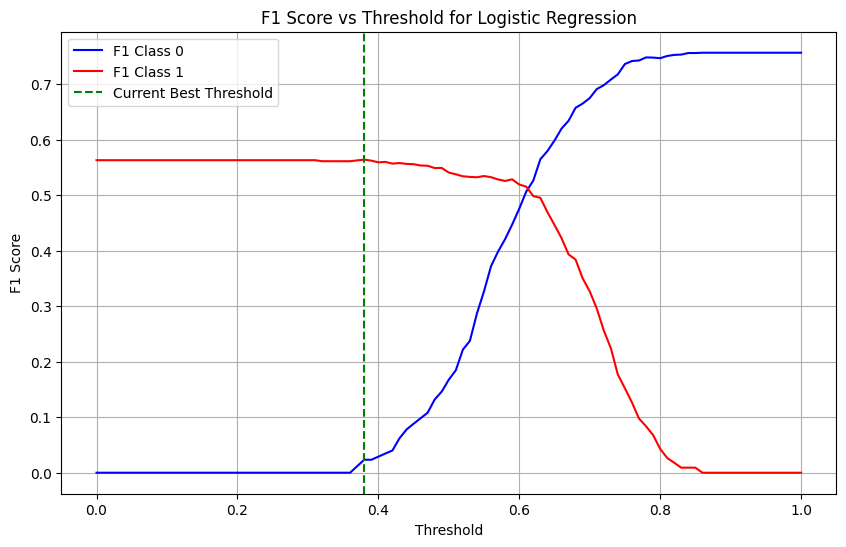

In [ ]:
# Assuming best_lr is your trained Logistic Regression pipeline
probs = best_lr.predict_proba(X_test)[:,1]  # probability of class 1
thresholds = np.linspace(0, 1, 101)

f1_class0 = []
f1_class1 = []

for t in thresholds:
    y_pred = (probs >= t).astype(int)
    f1_class0.append(f1_score(y_test, y_pred, pos_label=0))
    f1_class1.append(f1_score(y_test, y_pred, pos_label=1))

# Plot
plt.figure(figsize=(10,6))
plt.plot(thresholds, f1_class0, label='F1 Class 0', color='blue')
plt.plot(thresholds, f1_class1, label='F1 Class 1', color='red')
plt.axvline(x=0.38, color='green', linestyle='--', label='Current Best Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Predicted probabilities for class 1
probs = best_lr.predict_proba(X_test)[:, 1]

# Apply threshold = 0.62
threshold = 0.64
y_pred_thresh = (probs >= threshold).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_thresh)
print("Confusion Matrix at threshold 0.62:")
print(cm)

# Classification Report
cr = classification_report(y_test, y_pred_thresh)
print("\nClassification Report at threshold 0.62:")
print(cr)


Confusion Matrix at threshold 0.62:
[[179 158]
 [102 115]]

Classification Report at threshold 0.62:
              precision    recall  f1-score   support

           0       0.64      0.53      0.58       337
           1       0.42      0.53      0.47       217

    accuracy                           0.53       554
   macro avg       0.53      0.53      0.52       554
weighted avg       0.55      0.53      0.54       554



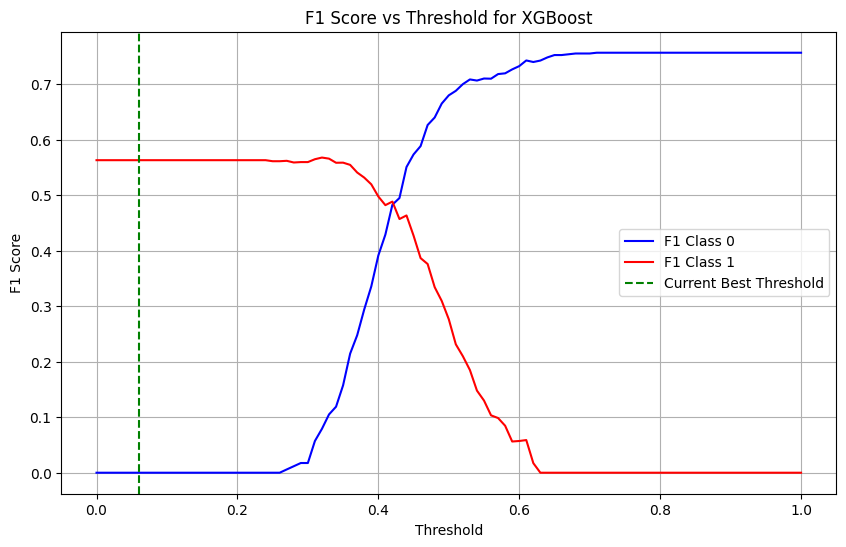

In [ ]:
# Assuming best_xgb is your trained XGBoost pipeline
probs = best_xgb.predict_proba(X_test)[:, 1]  # probability of class 1
thresholds = np.linspace(0, 1, 101)

f1_class0 = []
f1_class1 = []

for t in thresholds:
    y_pred = (probs >= t).astype(int)
    f1_class0.append(f1_score(y_test, y_pred, pos_label=0))
    f1_class1.append(f1_score(y_test, y_pred, pos_label=1))

# Plot
plt.figure(figsize=(10,6))
plt.plot(thresholds, f1_class0, label='F1 Class 0', color='blue')
plt.plot(thresholds, f1_class1, label='F1 Class 1', color='red')
plt.axvline(x=0.06, color='green', linestyle='--', label='Current Best Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold for XGBoost')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Predicted probabilities for class 1
probs = best_xgb.predict_proba(X_test)[:, 1]

# Apply threshold = 0.325
threshold = 0.41
y_pred_thresh = (probs >= threshold).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_thresh)
print("Confusion Matrix at threshold 0.325:")
print(cm)

# Classification Report
cr = classification_report(y_test, y_pred_thresh)
print("\nClassification Report at threshold 0.325:")
print(cr)


Confusion Matrix at threshold 0.325:
[[113 224]
 [ 77 140]]

Classification Report at threshold 0.325:
              precision    recall  f1-score   support

           0       0.59      0.34      0.43       337
           1       0.38      0.65      0.48       217

    accuracy                           0.46       554
   macro avg       0.49      0.49      0.46       554
weighted avg       0.51      0.46      0.45       554



📌 Best Threshold = 0.40000000000000013

🔍 Classification Report at Best Threshold:
              precision    recall  f1-score   support

           0       0.62      0.59      0.60       337
           1       0.41      0.44      0.42       217

    accuracy                           0.53       554
   macro avg       0.51      0.51      0.51       554
weighted avg       0.54      0.53      0.53       554


Confusion Matrix at Best Threshold:
[[198 139]
 [121  96]]


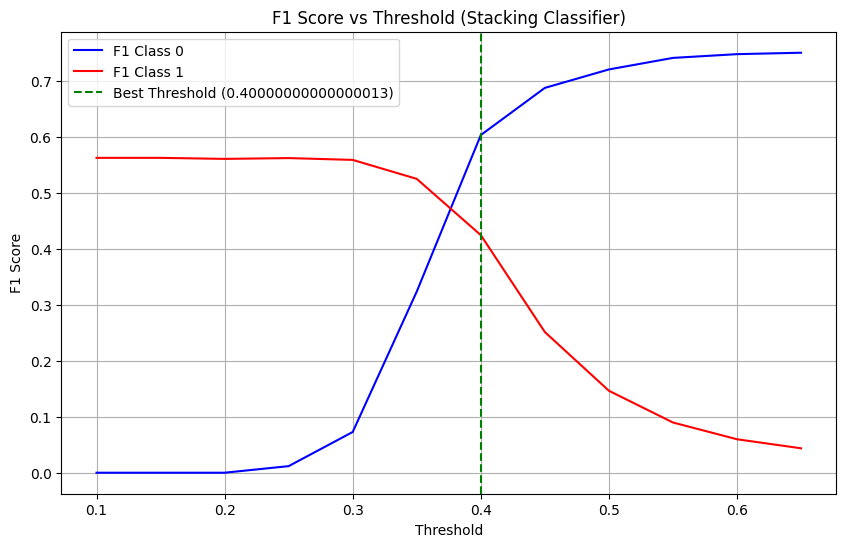

In [ ]:
# Stacking Classifier Pipeline


# ----------------------------
# Step 1: Define SMOTE (auto balance)
# ----------------------------
smote = SMOTE(random_state=42)  # automatically balances minority class

# ----------------------------
# Step 2: Define base learners
# ----------------------------
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)),
    ('xgb', XGBClassifier(
        n_estimators=100, max_depth=10, learning_rate=0.05,
        use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1.5, random_state=42)),
    ('lgbm', lgb.LGBMClassifier(n_estimators=200, max_depth=20, class_weight='balanced', random_state=42)),
    ('nb', GaussianNB())
]

# Meta-learner
final_estimator = XGBClassifier(
    n_estimators=100, max_depth=5, learning_rate=0.05,
    use_label_encoder=False, eval_metric='logloss', random_state=42
)

# ----------------------------
# Step 3: Define stacking classifier
# ----------------------------
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    passthrough=True,
    cv=5,
    n_jobs=-1
)

# ----------------------------
# Step 4: Build pipeline with SMOTE + Scaling
# ----------------------------
pipeline = ImbPipeline([
    ('smote', smote),
    ('scaler', StandardScaler()),
    ('clf', stacking_clf)
])

# ----------------------------
# Step 5: Train pipeline
# ----------------------------
pipeline.fit(X_train, y_train)

# ----------------------------
# Step 6: Predict probabilities
# ----------------------------
y_proba = pipeline.predict_proba(X_test)[:, 1]

# ----------------------------
# Step 7: Threshold tuning (F1 weighted)
# ----------------------------
thresholds = np.arange(0.1, 0.7, 0.05)
results = []

for thresh in thresholds:
    y_pred = (y_proba >= thresh).astype(int)
    f1_class1 = f1_score(y_test, y_pred, pos_label=1)
    f1_class0 = f1_score(y_test, y_pred, pos_label=0)
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    results.append({
        'Threshold': thresh,
        'F1_Class1': f1_class1,
        'F1_Class0': f1_class0,
        'F1_weighted': f1_weighted
    })

results_df = pd.DataFrame(results)

# ----------------------------
# Step 8: Select best threshold
# ----------------------------
best_idx = results_df['F1_weighted'].idxmax()
best_threshold = results_df.loc[best_idx, 'Threshold']
print("📌 Best Threshold =", best_threshold)

# ----------------------------
# Step 9: Final predictions at best threshold
# ----------------------------
y_pred_best = (y_proba >= best_threshold).astype(int)
print("\n🔍 Classification Report at Best Threshold:")
print(classification_report(y_test, y_pred_best))

print("\nConfusion Matrix at Best Threshold:")
print(confusion_matrix(y_test, y_pred_best))

# ----------------------------
# Step 10: F1 Score vs Threshold Plot
# ----------------------------
plt.figure(figsize=(10,6))
plt.plot(results_df['Threshold'], results_df['F1_Class0'], label='F1 Class 0', color='blue')
plt.plot(results_df['Threshold'], results_df['F1_Class1'], label='F1 Class 1', color='red')
plt.axvline(x=best_threshold, color='green', linestyle='--', label=f'Best Threshold ({best_threshold})')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold (Stacking Classifier)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#best model
joblib.dump(best_lr, "satisfaction_model.pkl")

# Save feature names
feature_names = X.columns.tolist()
joblib.dump(feature_names, "feature_names.pkl")

# Save vectorizers
 joblib.dump(desc_vectorizer, "desc_vectorizer.pkl")
 joblib.dump(res_vectorizer, "res_vectorizer.pkl")

IndentationError: unexpected indent (ipython-input-3297039439.py, line 9)

# **Model-2**

In [ ]:
df_model.columns

In [ ]:
# 1️ Split Features and Target
X = df_model.drop(columns=['Resolution_Time_Hours','resolution_days'])
Y = df_model['resolution_days']
n_samples, n_features = X.shape

# Check for leakage: correlation with target

corr_with_target = X.corrwith(Y).sort_values(ascending=False)
print("Top correlations with target:")
print(corr_with_target.head(10))
print("\nColumns with abs(corr) > 0.9 (possible leakage):")
leak_cols = corr_with_target[abs(corr_with_target) > 0.9].index.tolist()
print(leak_cols)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 2️ Define models

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
    "SVR": Pipeline([
        ('scaler_X', StandardScaler()),
        ('scaler_y', StandardScaler()),
        ('svr', SVR(kernel='rbf', C=1.0, epsilon=0.01))
    ])
}
# 3️ Train models and calculate metrics

results = []

def adjusted_r2(r2, n, k):
    return 1 - (1-r2)*(n-1)/(n-k-1)

for name, model in models.items():
    if name == "SVR":
        # SVR requires scaled X and y
        model.fit(X_train, y_train.values.reshape(-1,1).ravel())
        preds = model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    adj_r2 = adjusted_r2(r2, X_test.shape[0], X_test.shape[1])

    results.append((name, mae, rmse, r2, adj_r2))

results_df = pd.DataFrame(results, columns=["Model","MAE","RMSE","R2","Adjusted_R2"])
print("\n✅ Model comparison:")
print(results_df.sort_values(by="Adjusted_R2", ascending=False))

In [ ]:
# 4️ Select best model (highest Adjusted R²)
best_model_name = results_df.sort_values(by="Adjusted_R2", ascending=False).iloc[0]["Model"]
print(f"\n📌 Best Model: {best_model_name}")
best_model = models[best_model_name]

if best_model_name == "SVR":
    preds_best = best_model.predict(X_test)
else:
    preds_best = best_model.predict(X_test)

In [ ]:
# 5️ Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, preds_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual resolution_days")
plt.ylabel("Predicted resolution_days")
plt.title(f"Actual vs Predicted ({best_model_name})")
plt.grid(True)
plt.show()

In [ ]:
# 6️ Plot Residuals
residuals = y_test - preds_best
plt.figure(figsize=(8,6))
plt.scatter(preds_best, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted resolution_days")
plt.ylabel("Residuals")
plt.title(f"Residuals Plot ({best_model_name})")
plt.grid(True)
plt.show()

In [ ]:
joblib.dump(best_model, "linear_regression_model.pkl")
print(f"✅ Best model saved as linear_regression_model.pkl")

model_features = X.columns.tolist()
joblib.dump(model_features, "model_features.pkl")
print("✅ Feature names saved as model_features.pkl")